<a href="https://colab.research.google.com/github/secons127/2024-1-my-BDA/blob/main/inclass/04w_240326_tue_ch06_dataframe_handling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**

#파이썬 설치 확인

In [2]:
import site
site.getsitepackages()

['/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.10/dist-packages']

In [3]:
import sys
import pandas as pd
import numpy as np

print(sys.version)
print(pd.__version__)
print(np.__version__)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
1.5.3
1.25.2


#그래프 해상도 설정

In [ ]:
%%html
<!--마크다운 표 정렬 설정-->
<style> table {float:left} </style>

#코랩에서 한글 처리

In [ ]:
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 23.7 MB/s eta 0:00:00


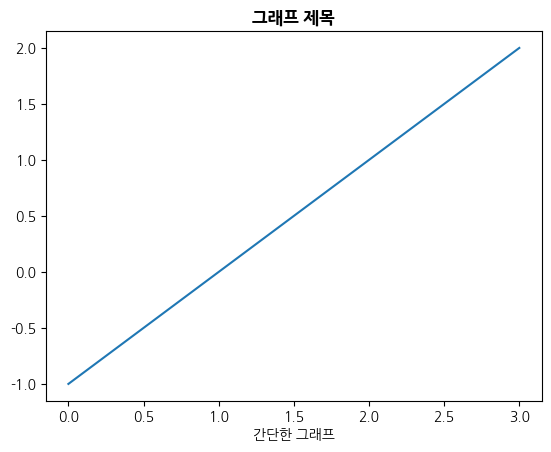

In [ ]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.plot([-1, 0, 1, 2])
plt.title('그래프 제목', fontweight="bold")
plt.xlabel('간단한 그래프')
plt.show()

In [4]:
!git clone https://github.com/ai7dnn/data.git

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (24/24), 4.00 MiB | 6.72 MiB/s, done.


In [5]:
import pandas as pd

exam = pd.read_csv('data/exam.csv')
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [6]:
exam.sample(5)

,id,nclass,math,english,science
18,19,5,89,68,87
15,16,4,58,98,65
11,12,3,45,85,32
1,2,1,60,97,60
14,15,4,75,56,78


In [7]:
exam.query('nclass == 1')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [8]:
# 2반인 경우만 추출
exam.query('nclass == 2')

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [10]:
#수학 점수가 50점을 초과한 경우
exam.query('math > 50')

,id,nclass,math,english,science
1,2,1,60,97,60
6,7,2,80,90,45
7,8,2,90,78,25
10,11,3,65,65,65
14,15,4,75,56,78
15,16,4,58,98,65
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87
19,20,5,78,83,58


In [11]:
#영어 점수가 80점 이하인 경우
exam.query('english < 80')

,id,nclass,math,english,science
7,8,2,90,78,25
10,11,3,65,65,65
14,15,4,75,56,78
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87


### 초과, 미만, 이상, 이하 조건 걸기

In [ ]:
# 수학 점수가 50점을 초과한 경우
exam.query('math > 50')

,id,nclass,math,english,science
1,2,1,60,97,60
6,7,2,80,90,45
7,8,2,90,78,25
10,11,3,65,65,65
14,15,4,75,56,78
15,16,4,58,98,65
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87
19,20,5,78,83,58


In [ ]:
# 수학 점수가 50점 미만인 경우
exam.query('math < 50')

,id,nclass,math,english,science
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
8,9,3,20,98,15
11,12,3,45,85,32
12,13,4,46,98,65
13,14,4,48,87,12


In [ ]:
# 영어 점수가 50점 이상인 경우
exam.query('english >= 50')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [ ]:
# 영어 점수가 80점 이하인 경우
exam.query('english <= 80')

,id,nclass,math,english,science
4,5,2,25,80,65
7,8,2,90,78,25
10,11,3,65,65,65
14,15,4,75,56,78
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87


### 여러 조건을 충족하는 행 추출하기

In [ ]:
# 1반이면서 수학 점수가 50 점 이상인 경우
exam.query('nclass == 1 & math >= 50')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60


In [ ]:
exam[(exam.nclass == 1) & (exam.math >= 50)] # 괄호를 반드시 사용

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60


In [ ]:
# 2반이면서 영어 점수가 80 점 이상인 경우
exam.query('nclass == 2 & english >= 80')

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45


### 여러 조건 중 하나 이상 충족하는 행 추출하기

In [ ]:
# 수학 점수가 90점 이상이거나 영어 점수가 90점 이상인 경우
exam.query('math >= 90 | english >= 90')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
3,4,1,30,98,58
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
12,13,4,46,98,65
15,16,4,58,98,65


In [ ]:
# 영어 점수가 90점 미만이거나 과학 점수가 50점 미만인 경우
exam.query('english < 90 | science < 50')

,id,nclass,math,english,science
2,3,1,45,86,78
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
13,14,4,48,87,12


### 목록에 해당하는 행 추출하기

In [ ]:
# 1, 3, 5반에 해당하면 추출
exam.query('nclass == 1 | nclass == 3 | nclass == 5')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [ ]:
# 1, 3, 5반에 해당하면 추출
exam.query('nclass in [1, 3, 5]') # 시험 예상

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [ ]:
exam[exam.nclass.isin([1, 3, 5])] # 시험 예상!!!!!!!!!!!!!!!!!!!!!!

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [ ]:
exam[exam["nclass"].isin([1, 3])]

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32


In [ ]:
exam["nclass"]

0     1
1     1
2     1
3     1
4     2
5     2
6     2
7     2
8     3
9     3
10    3
11    3
12    4
13    4
14    4
15    4
16    5
17    5
18    5
19    5
Name: nclass, dtype: int64

### 추출한 행으로 데이터 만들기

In [ ]:
# nclass가 1인 행 추출해 nclass1에 할당
nclass1 = exam.query('nclass == 1')

# nclass가 2인 행 추출해 nclass2에 할당
nclass2 = exam.query('nclass == 2')

In [ ]:
nclass1['math'].mean()  # 1반 수학 점수 평균 구하기

46.25

In [ ]:
nclass2['math'].mean()  # 2반 수학 점수 평균 구하기

61.25

In [ ]:
# nclass가 1인 행 추출해 nclass1에 할당
nclass1 = exam[exam.nclass == 1]

# nclass가 2인 행 추출해 nclass2에 할당
nclass2 = exam[exam.nclass == 2]

In [ ]:
nclass1['math'].mean()  # 1반 수학 점수 평균 구하기

46.25

In [ ]:
nclass1.math.mean()  # 1반 수학 점수 평균 구하기

46.25

In [ ]:
nclass2.math.mean()  # 2반 수학 점수 평균 구하기

61.25